# hw2: Решающие деревья

*Спасибо великому курсу великого Евгения Соколова*

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплементацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

Все данные, на которых будут обучаться модели, вы можете найти на диске.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Неэффективная и/или неоригинальная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Заполненный ноутбук ```hw2-trees.ipynb``` и модуль с реализованными функциями и классами ```hw2code.py``` необходимо загрузить на свой Github. Затем нужно оставить комментарий в Google-таблице с оценками в столбце <<hw2>> в строке со своей фамилией о том, что вы выполнили работу с указанием ника на Kaggle. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

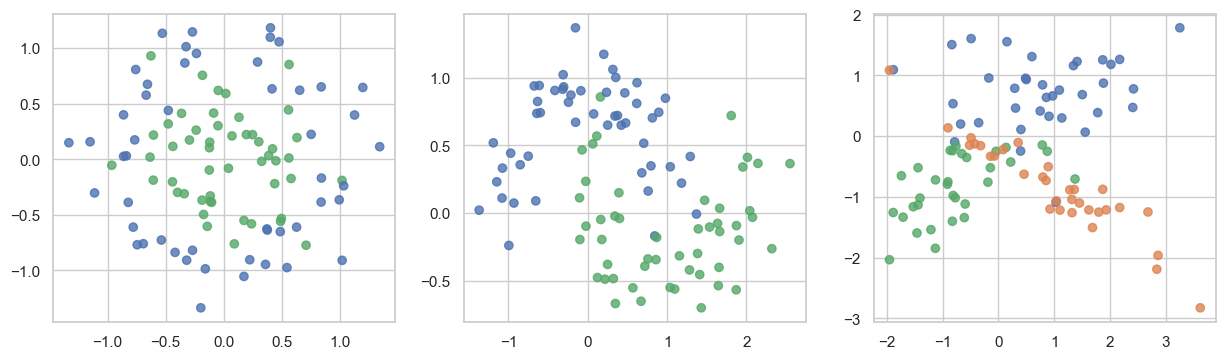

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

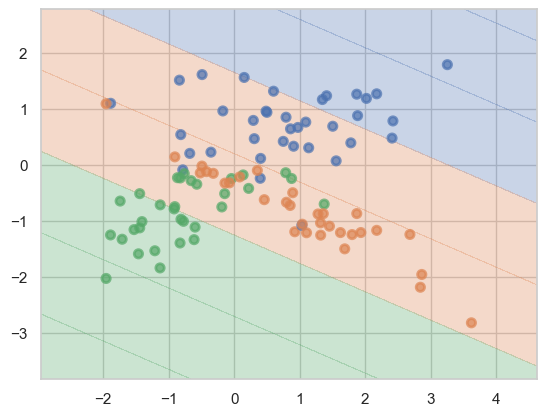

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dataset_definitions = [
    ('circles', make_circles(noise=0.2, factor=0.5, random_state=42)),
    ('moons',   make_moons(noise=0.2, random_state=42)),
    ('linear3', make_classification(n_classes=3, n_clusters_per_class=1,
                                    n_features=2, class_sep=0.8,
                                    random_state=3, n_redundant=0))
]

circles  — train_acc = 1.000, test_acc = 0.700
moons    — train_acc = 1.000, test_acc = 0.933
linear3  — train_acc = 1.000, test_acc = 0.667


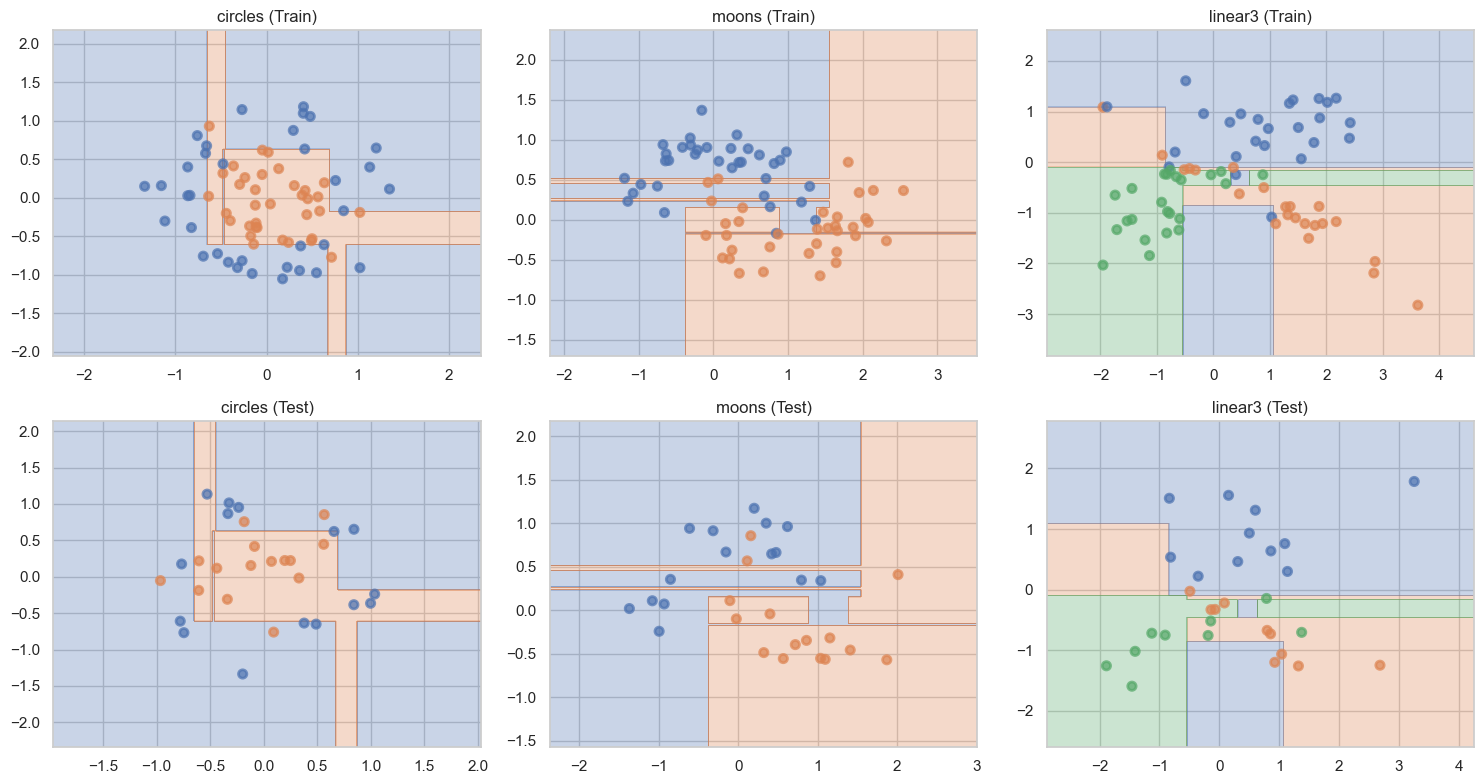

In [8]:
fig_plots, axes_grid_subplots = plt.subplots(2, 3, figsize=(15, 8))
for idx, (data_name, (features_set, target_set)) in enumerate(dataset_definitions):

    X_train_part, X_test_part, y_train_part, y_test_part = train_test_split(
        features_set, target_set, test_size=0.3, stratify=target_set, random_state=42
    )
    dt_classifier = DecisionTreeClassifier(random_state=42)
    dt_classifier.fit(X_train_part, y_train_part)

    train_accuracy_score = accuracy_score(y_train_part, dt_classifier.predict(X_train_part))
    test_accuracy_score =  accuracy_score(y_test_part,  dt_classifier.predict(X_test_part))
    print(f"{data_name:8s} — train_acc = {train_accuracy_score:.3f}, test_acc = {test_accuracy_score:.3f}")

    plt.sca(axes_grid_subplots[0, idx])
    plot_surface(dt_classifier, X_train_part, y_train_part)
    axes_grid_subplots[0, idx].set_title(f"{data_name} (Train)")

    plt.sca(axes_grid_subplots[1, idx])
    plot_surface(dt_classifier, X_test_part, y_test_part)
    axes_grid_subplots[1, idx].set_title(f"{data_name} (Test)")

fig_plots.tight_layout()
plt.show()

__Ответ:__

Учитывая значение train_acc, равное 1, в сопоставлении с test_acc, можно уверенно констатировать наличие переобучения модели. Графические данные подтверждают этот вывод, демонстрируя характерные признаки переобучения в виде небольших горизонтальных отклонений.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

In [9]:
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split

dataset_specs = [
    ('circles', make_circles(noise=0.2, factor=0.5, random_state=42)),
    ('moons',   make_moons(noise=0.2, random_state=42)),
    ('linear3', make_classification(
        n_classes=3, n_clusters_per_class=1,
        n_features=2, class_sep=0.8,
        random_state=3, n_redundant=0
    ))
]

data_partitions = {}
for spec_name, (X_features_spec, y_labels_spec) in dataset_specs:
    X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(
        X_features_spec, y_labels_spec, test_size=0.3, stratify=y_labels_spec, random_state=42
    )
    data_partitions[spec_name] = (X_train_subset, X_test_subset, y_train_subset, y_test_subset)

hyperparameter_config = {
    'max_depth_val':       [1, 3, None],
    'min_samples_per_leaf':[1, 5, 10]
}


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

all_results_rows = []
for d_name, (X_tr_data, X_te_data, y_tr_labels, y_te_labels) in data_partitions.items():
    for depth_option in hyperparameter_config['max_depth_val']:
        for leaf_sample_count in hyperparameter_config['min_samples_per_leaf']:
            current_dt_model_param = DecisionTreeClassifier(
                max_depth=depth_option,
                min_samples_leaf=leaf_sample_count,
                random_state=42
            )
            current_dt_model_param.fit(X_tr_data, y_tr_labels)
            all_results_rows.append({
                'dataset_id':         d_name,
                'tree_max_depth':       depth_option,
                'leaf_min_samples':leaf_sample_count,
                'train_accuracy':       accuracy_score(y_tr_labels, current_dt_model_param.predict(X_tr_data)),
                'test_accuracy':        accuracy_score(y_te_labels,  current_dt_model_param.predict(X_te_data))
            })

results_dataframe = pd.DataFrame(all_results_rows)


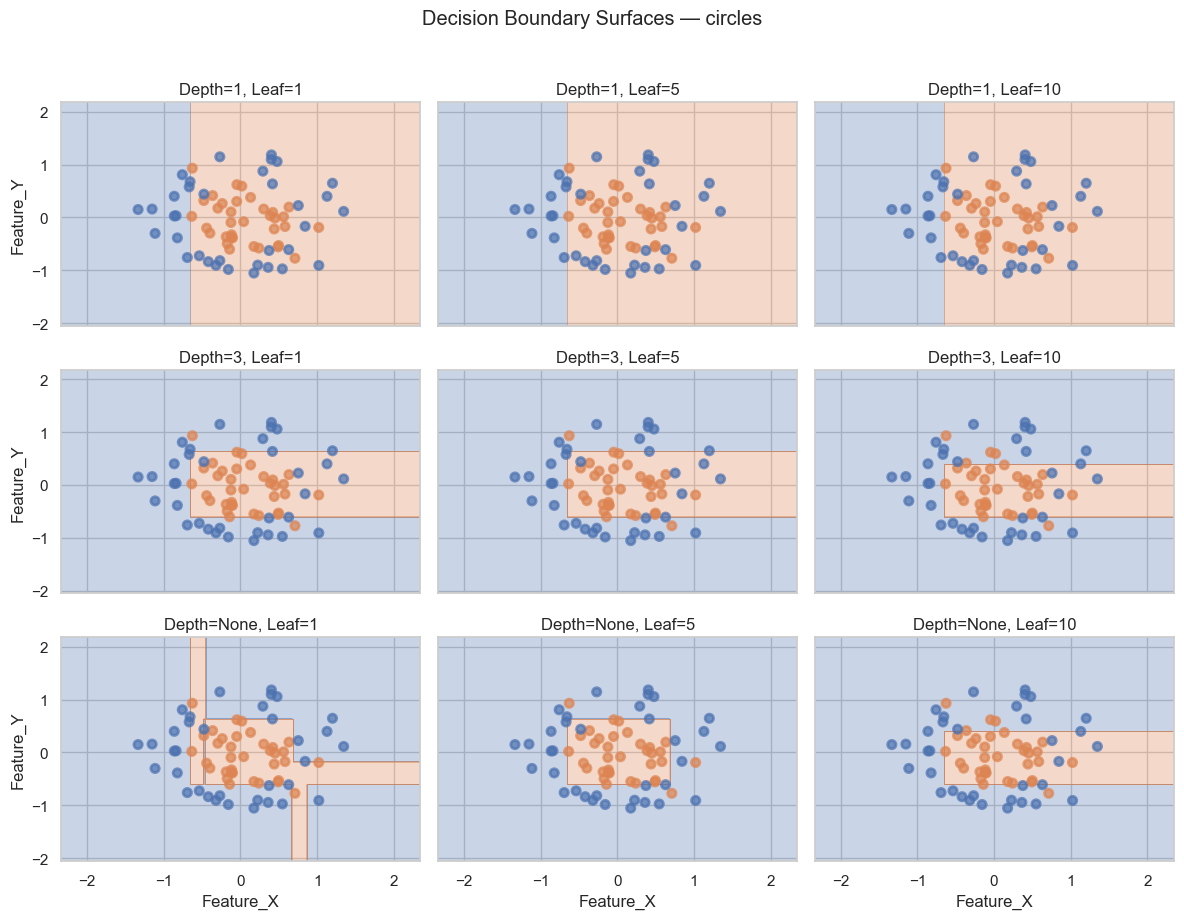

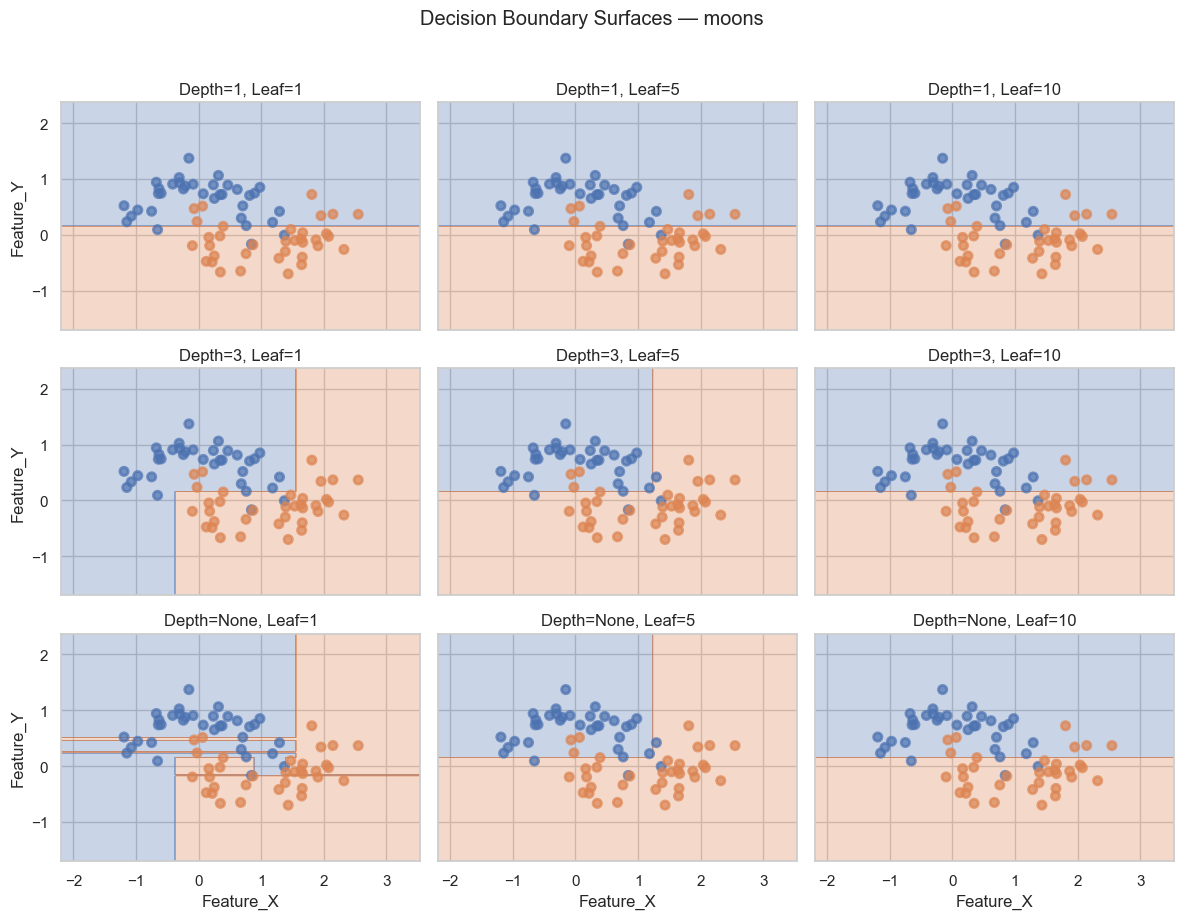

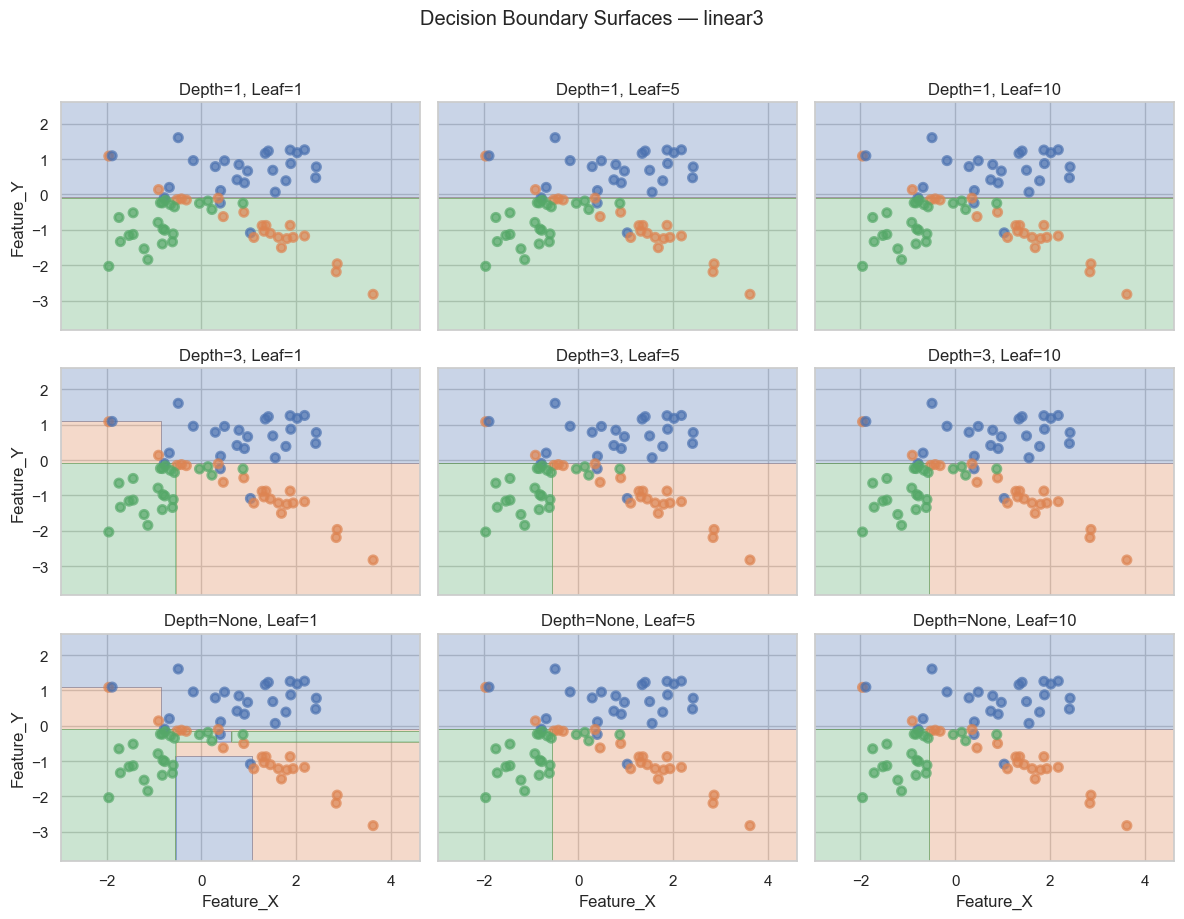

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier


for d_id, (X_train_s, X_test_s, y_train_s, y_test_s) in data_partitions.items():
    num_depth_options = len(hyperparameter_config['max_depth_val'])
    num_leaf_options = len(hyperparameter_config['min_samples_per_leaf'])
    fig_param_plots, axes_param_grid = plt.subplots(num_depth_options, num_leaf_options, figsize=(4*num_leaf_options, 3*num_depth_options), sharex=True, sharey=True)

    for i_d, current_depth in enumerate(hyperparameter_config['max_depth_val']):
        for j_l, current_leaf in enumerate(hyperparameter_config['min_samples_per_leaf']):
            dt_model_for_plot = DecisionTreeClassifier(
                max_depth=current_depth,
                min_samples_leaf=current_leaf,
                random_state=42
            )
            dt_model_for_plot.fit(X_train_s, y_train_s)

            current_subplot_ax = axes_param_grid[i_d, j_l]
            plt.sca(current_subplot_ax)
            plot_surface(dt_model_for_plot, X_train_s, y_train_s)
            current_subplot_ax.set_title(f"Depth={current_depth}, Leaf={current_leaf}")
            if i_d == num_depth_options - 1: current_subplot_ax.set_xlabel("Feature_X")
            if j_l == 0:       current_subplot_ax.set_ylabel("Feature_Y")

    fig_param_plots.suptitle(f"Decision Boundary Surfaces — {d_id}", y=1.02)
    plt.tight_layout()
    plt.show()


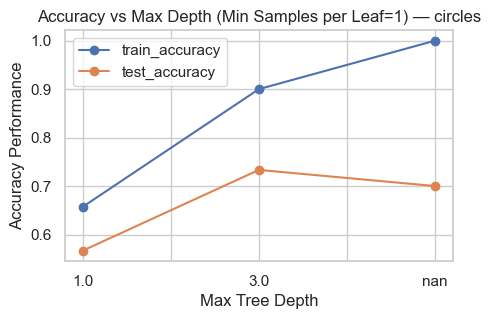

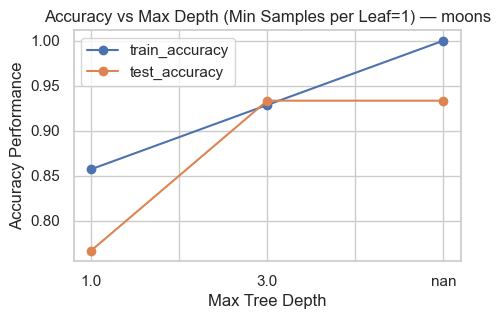

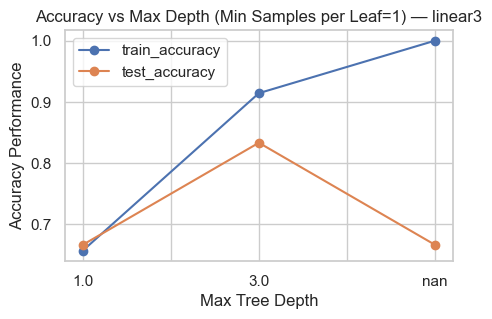

In [12]:
import matplotlib.pyplot as plt

for dataset_label in results_dataframe['dataset_id'].unique():
    df_filtered_by_leaf = results_dataframe[(results_dataframe['dataset_id'] == dataset_label) & (results_dataframe['leaf_min_samples'] == 1)].copy()
    df_filtered_by_leaf['depth_str'] = df_filtered_by_leaf['tree_max_depth'].astype(str)

    df_filtered_by_leaf.plot(
        x='depth_str',
        y=['train_accuracy','test_accuracy'],
        marker='o',
        figsize=(5,3),
        title=f"Accuracy vs Max Depth (Min Samples per Leaf=1) — {dataset_label}"
    )
    plt.xlabel("Max Tree Depth")
    plt.ylabel("Accuracy Performance")
    plt.grid(True)
    plt.show()


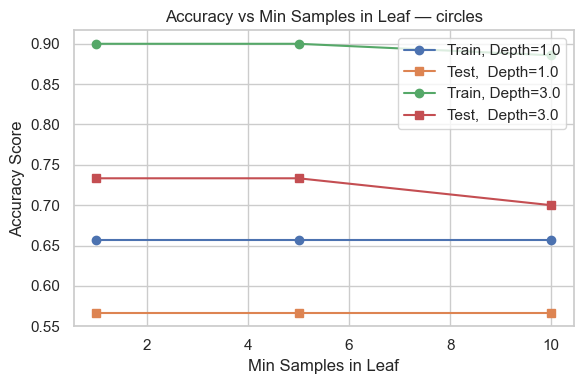

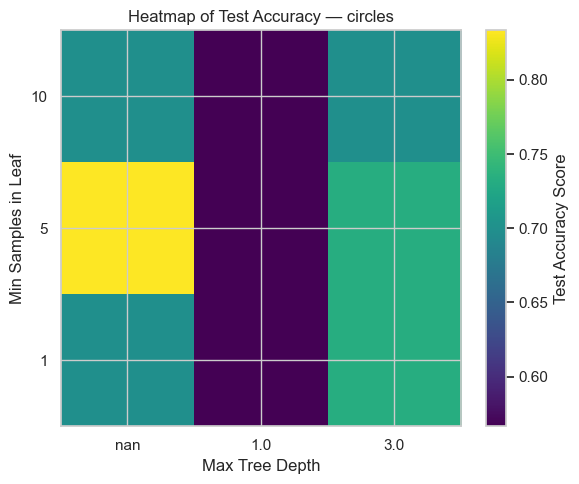

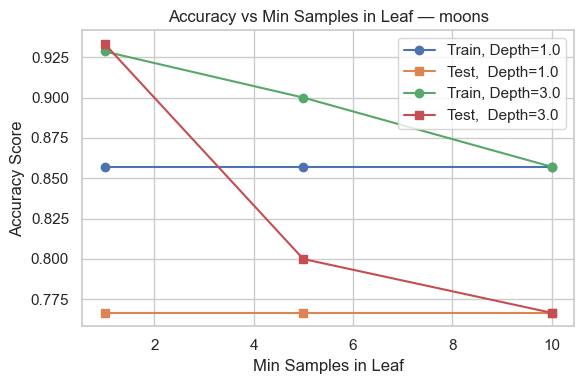

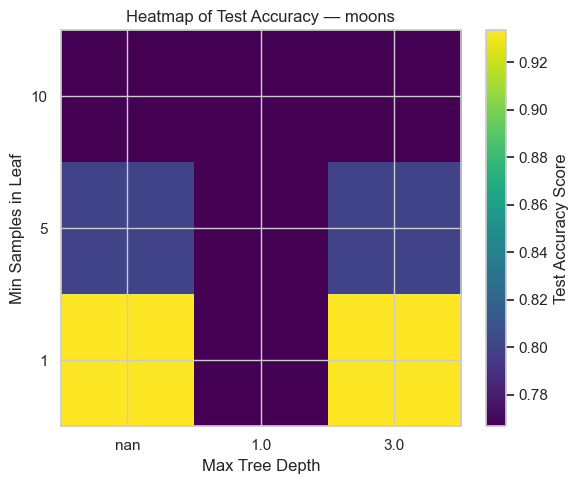

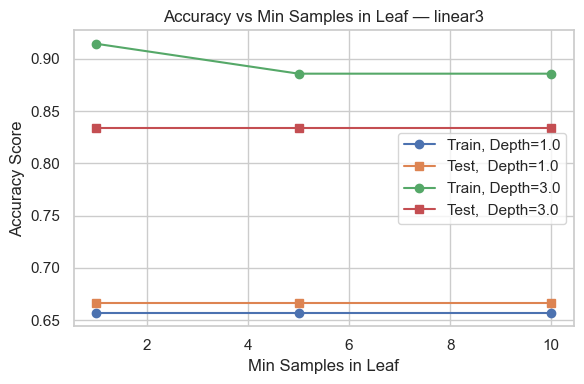

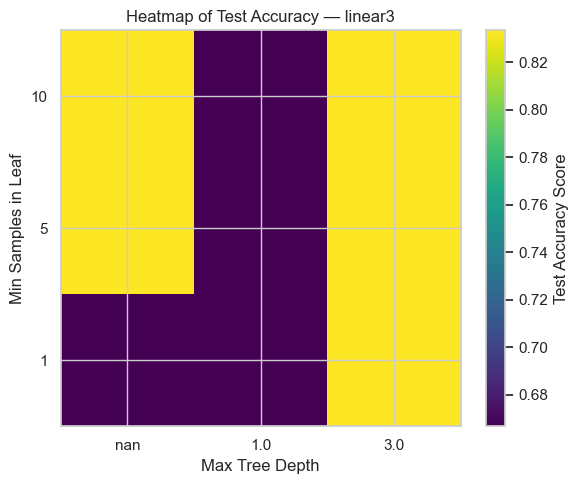

In [13]:
import matplotlib.pyplot as plt

for dataset_label_name in results_dataframe['dataset_id'].unique():
    df_for_current_dataset = results_dataframe[results_dataframe['dataset_id'] == dataset_label_name]

    plt.figure(figsize=(6,4))
    for current_max_depth in sorted(df_for_current_dataset['tree_max_depth'].dropna().unique(), key=lambda x: (x is None, x)):
        df_by_depth = df_for_current_dataset[df_for_current_dataset['tree_max_depth'] == current_max_depth]
        plt.plot(df_by_depth['leaf_min_samples'], df_by_depth['train_accuracy'],
                 marker='o', label=f"Train, Depth={current_max_depth}")
        plt.plot(df_by_depth['leaf_min_samples'], df_by_depth['test_accuracy'],
                 marker='s', label=f"Test,  Depth={current_max_depth}")
    plt.title(f"Accuracy vs Min Samples in Leaf — {dataset_label_name}")
    plt.xlabel("Min Samples in Leaf")
    plt.ylabel("Accuracy Score")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    test_accuracy_pivot = df_for_current_dataset.pivot(index='leaf_min_samples', columns='tree_max_depth', values='test_accuracy')
    plt.figure(figsize=(6,5))
    plt.imshow(test_accuracy_pivot.values, aspect='auto', origin='lower', cmap='viridis')
    plt.colorbar(label='Test Accuracy Score')
    plt.xticks(range(len(test_accuracy_pivot.columns)), test_accuracy_pivot.columns)
    plt.yticks(range(len(test_accuracy_pivot.index)), test_accuracy_pivot.index)
    plt.xlabel('Max Tree Depth')
    plt.ylabel('Min Samples in Leaf')
    plt.title(f"Heatmap of Test Accuracy — {dataset_label_name}")
    plt.tight_layout()
    plt.show()


__Ответ:__

_Влияние глубины дерева_

На всех трёх исследованных наборах данных увеличение глубины дерева свыше трёх приводит к переобучению. Это проявляется в достижении почти 100% точности на обучающей выборке при одновременном снижении точности на тестовой.

_Влияние количества листьев_

После пяти листьев наблюдается явная стагнация качества. Вероятно, это связано с исчерпанием возможностей дерева по эффективному разделению пространства признаков или началом переобучения на шумах. Отдельно стоит отметить выборку moon, где вместо стагнации зафиксировано резкое снижение качества при глубине 3, что обусловлено спецификой самой выборки.

_Выводы по датасетам_

- Кружки: Оптимально применять параметры до точки стагнации. Модель эффективно выучивает границу, избегая переобучения.
- Луны: Даже при максимальной глубине с одним объектом в листьях, переобучение наступает быстро. Это позволяет заключить, что решающие деревья не являются эффективным методом для данной задачи.
- Linear: Задача хорошо аппроксимируется деревьями. Модель демонстрирует устойчивость даже при относительно больших значениях глубины и количества листьев.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw2code.py

__Сделано__

__Задание 4. (0.5 балла)__

Загрузите таблицу students.csv (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


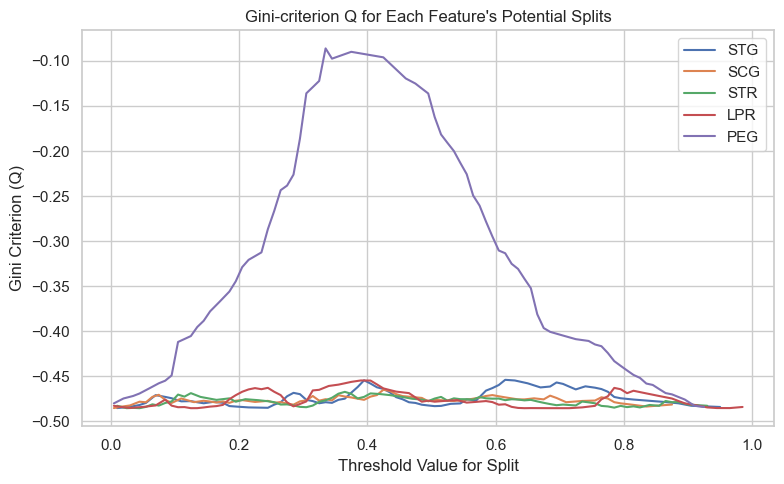

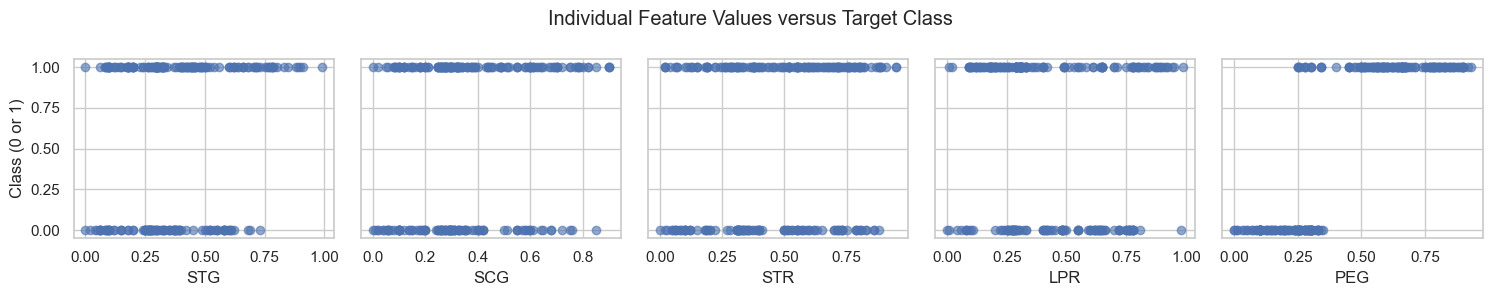

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hw2code import find_best_split

students_df = pd.read_csv("datasets/students.csv")

feature_matrix = students_df.iloc[:, :5].values
target_vector_students = students_df.iloc[:, 5].values
feature_labels_list = students_df.columns[:5]

plt.figure(figsize=(8, 5))
plot_axis_gini = plt.gca()

for index, current_feature_name in enumerate(feature_labels_list):
    current_feature_values = feature_matrix[:, index]

    threshold_options, calculated_ginis, _, _ = find_best_split(current_feature_values, target_vector_students)

    plot_axis_gini.plot(threshold_options, calculated_ginis, label=current_feature_name)

plot_axis_gini.set_xlabel("Threshold Value for Split")
plot_axis_gini.set_ylabel("Gini Criterion (Q)")
plot_axis_gini.set_title("Gini-criterion Q for Each Feature's Potential Splits")
plot_axis_gini.legend()
plt.tight_layout()
plt.show()

fig_feature_scatter, axes_scatter_grid = plt.subplots(1, 5, figsize=(15, 3), sharey=True)
for f_idx, scatter_feature_name in enumerate(feature_labels_list):
    axes_scatter_grid[f_idx].scatter(feature_matrix[:, f_idx], target_vector_students, alpha=0.6)
    axes_scatter_grid[f_idx].set_xlabel(scatter_feature_name)
    if f_idx == 0:
        axes_scatter_grid[f_idx].set_ylabel("Class (0 or 1)")
fig_feature_scatter.suptitle("Individual Feature Values versus Target Class")
plt.tight_layout()
plt.show()


__Вывод__

Исключительно показатель PEG продемонстрировал наилучшие результаты как на кривых, так и на точечных диаграммах, достигая оптимального значения при пороге 0.35.

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

1-2. Оптимальный порог разделения по признаку PEG
На основе анализа графиков кривых и диаграмм рассеяния (scatter plots) установлено, что оптимальное разделение классов достигается по признаку PEG в районе значения 0.35. Это подтверждается наличием двух практически обособленных кластеров точек, граница между которыми совпадает с пиковым значением Gini-кривой. В отличие от PEG, остальные признаки демонстрируют существенное перемешивание классов без выраженных точек разделения.

3-4. Характеристики распределения признаков
Признак с хорошей классифицирующей способностью обычно имеет распределение, близкое к нормальному. В то же время, неэффективные признаки характеризуются практически плоским распределением, что указывает на их низкую информативность для разделения классов.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw2code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Сделано__

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from hw2code import DecisionTree

mushroom_dataset_df = pd.read_csv("datasets/agaricus-lepiota.data", header=None)

for column_id in mushroom_dataset_df.columns:
    encoder = LabelEncoder()
    mushroom_dataset_df[column_id] = encoder.fit_transform(mushroom_dataset_df[column_id])

mushroom_target_labels = mushroom_dataset_df.iloc[:, 0].values
mushroom_features_data = mushroom_dataset_df.iloc[:, 1:].values

X_train_mush, X_test_mush, y_train_mush, y_test_mush = train_test_split(
    mushroom_features_data, mushroom_target_labels, test_size=0.5, stratify=mushroom_target_labels, random_state=42
)

feature_types_for_mushrooms = ["categorical"] * mushroom_features_data.shape[1]
my_dt_mushroom_model = DecisionTree(feature_types_for_mushrooms)
my_dt_mushroom_model.fit(X_train_mush, y_train_mush)

predictions_for_mush = my_dt_mushroom_model.predict(X_test_mush)
accuracy_mushrooms_model = accuracy_score(y_test_mush, predictions_for_mush)

print(f"Classification Accuracy for Mushroom Dataset: {accuracy_mushrooms_model:.3f}")

def calculate_tree_depth(node_dict):
    if node_dict["type"] == "terminal":
        return 0
    left_subtree_depth  = calculate_tree_depth(node_dict["left_child"])
    right_subtree_depth = calculate_tree_depth(node_dict["right_child"])
    return 1 + max(left_subtree_depth, right_subtree_depth)

tree_final_depth = calculate_tree_depth(my_dt_mushroom_model._tree)
print(f"Depth of the trained Mushroom Decision Tree: {tree_final_depth}")

Classification Accuracy for Mushroom Dataset: 1.000
Depth of the trained Mushroom Decision Tree: 7


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

ttt_endgame_df = pd.read_csv("datasets/tic-tac-toe-endgame.csv", header=None)

ttt_features_raw = ttt_endgame_df.iloc[:, :-1]
ttt_target_raw = ttt_endgame_df.iloc[:, -1]

ttt_features_encoded = ttt_features_raw.apply(LabelEncoder().fit_transform)

target_encoder_ttt = LabelEncoder()
ttt_target_encoded = target_encoder_ttt.fit_transform(ttt_target_raw)



In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

ttt_feat_types = ["categorical"] * ttt_features_encoded.shape[1]

hyperparam_grid_search = {
    'max_depth_val':       [None, 1, 2, 3, 5, 7],
    'min_samples_split_val':[2, 5, 10, 20],
    'min_samples_leaf_val': [1, 5, 10, 20]
}

all_cv_results = []

for current_max_d in hyperparam_grid_search['max_depth_val']:
    for current_min_s_split in hyperparam_grid_search['min_samples_split_val']:
        for current_min_s_leaf in hyperparam_grid_search['min_samples_leaf_val']:
            dt_model_candidate = DecisionTree(ttt_feat_types,
                                                    max_depth=current_max_d,
                                                    min_samples_split=current_min_s_split,
                                                    min_samples_leaf=current_min_s_leaf)
            cv_accuracy_scores = cross_val_score(
                dt_model_candidate,
                ttt_features_encoded.values,
                ttt_target_encoded,
                cv=5,
                scoring='accuracy'
            )
            all_cv_results.append({
                'maximum_depth': current_max_d,
                'minimum_split_samples': current_min_s_split,
                'minimum_leaf_samples': current_min_s_leaf,
                'average_accuracy': cv_accuracy_scores.mean()
            })

cv_results_df = pd.DataFrame(all_cv_results)

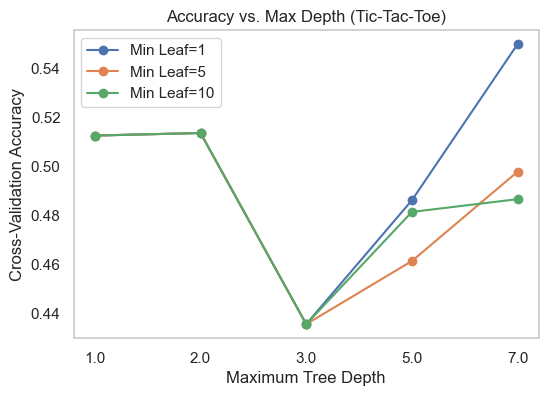

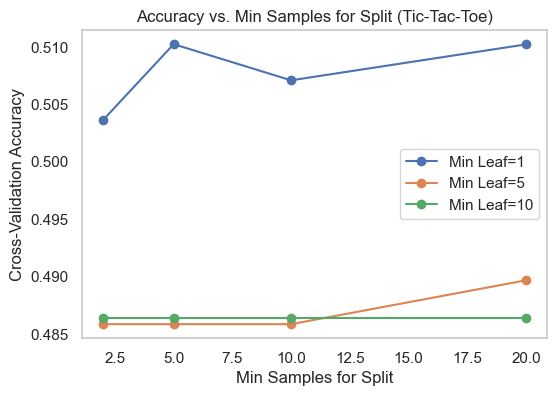

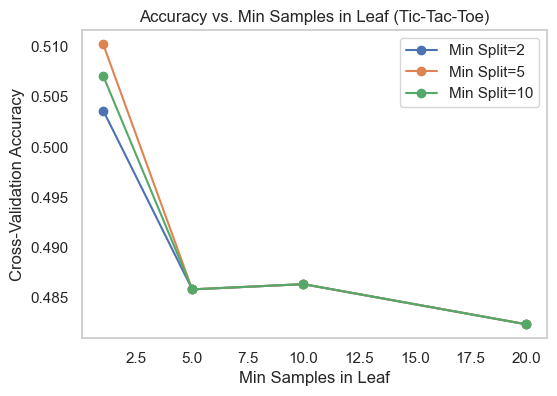

In [20]:
plt.figure(figsize=(6,4))
for leaf_filter_val in [1,5,10]:
    df_subset_leaf = cv_results_df[cv_results_df['minimum_leaf_samples']==leaf_filter_val]
    avg_acc_by_depth = df_subset_leaf.groupby('maximum_depth')['average_accuracy'].mean()
    plt.plot(avg_acc_by_depth.index.astype(str), avg_acc_by_depth.values, marker='o', label=f"Min Leaf={leaf_filter_val}")
plt.xlabel("Maximum Tree Depth")
plt.ylabel("Cross-Validation Accuracy")
plt.legend()
plt.title("Accuracy vs. Max Depth (Tic-Tac-Toe)")
plt.grid()
plt.show()

plt.figure(figsize=(6,4))
for leaf_filter_val_2 in [1,5,10]:
    df_subset_leaf_2 = cv_results_df[cv_results_df['minimum_leaf_samples']==leaf_filter_val_2]
    avg_acc_by_split = df_subset_leaf_2.groupby('minimum_split_samples')['average_accuracy'].mean()
    plt.plot(avg_acc_by_split.index, avg_acc_by_split.values, marker='o', label=f"Min Leaf={leaf_filter_val_2}")
plt.xlabel("Min Samples for Split")
plt.ylabel("Cross-Validation Accuracy")
plt.legend()
plt.title("Accuracy vs. Min Samples for Split (Tic-Tac-Toe)")
plt.grid()
plt.show()

plt.figure(figsize=(6,4))
for split_filter_val in [2,5,10]:
    df_subset_split = cv_results_df[cv_results_df['minimum_split_samples']==split_filter_val]
    avg_acc_by_leaf = df_subset_split.groupby('minimum_leaf_samples')['average_accuracy'].mean()
    plt.plot(avg_acc_by_leaf.index, avg_acc_by_leaf.values, marker='o', label=f"Min Split={split_filter_val}")
plt.xlabel("Min Samples in Leaf")
plt.ylabel("Cross-Validation Accuracy")
plt.legend()
plt.title("Accuracy vs. Min Samples in Leaf (Tic-Tac-Toe)")
plt.grid()
plt.show()

__Вывод__

Глубина дерева оказывает наиболее существенное влияние на модель: оптимальное количество уровней ветвления составляет примерно семь.

Минимальный размер листа значительно ограничивает обучающую способность модели. Для достижения наилучших результатов значение не должно превышать 1-2.

Минимальное количество образцов для разделения оказывает заметное влияние только в сочетании с очень мелкими листьями и небольшими деревьями. В остальных случаях его воздействие минимально.

Примечательно, что самое низкое значение точности (около 0.55) указывает на недостаточную эффективность текущей реализации при работе с номинальными признаками.

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
from hw2code import DecisionTree

prepared_datasets_dict = {}

raw_mush_data = pd.read_csv("datasets/agaricus-lepiota.data", header=None)
for col_id in raw_mush_data.columns:
    raw_mush_data[col_id] = LabelEncoder().fit_transform(raw_mush_data[col_id])
X_mushrooms_processed = raw_mush_data.iloc[:,1:].values
y_mushrooms_processed = raw_mush_data.iloc[:,0].values
prepared_datasets_dict['mushrooms_data'] = (X_mushrooms_processed, y_mushrooms_processed)

raw_ttt_data = pd.read_csv("datasets/tic-tac-toe-endgame.csv", header=None)
X_ttt_labeled = raw_ttt_data.iloc[:,:-1].apply(LabelEncoder().fit_transform).values
y_ttt_labeled = LabelEncoder().fit_transform(raw_ttt_data.iloc[:,-1].values)
prepared_datasets_dict['tic_tac_toe_data'] = (X_ttt_labeled, y_ttt_labeled)

cars_dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
cars_column_names = ["buying","maint","doors","persons","lug_boot","safety","class"]
raw_cars_data = pd.read_csv(cars_dataset_url, names=cars_column_names)

raw_cars_data['class'] = raw_cars_data['class'].map(lambda v: 0 if v in ('unacc','acc') else 1)
X_cars_labeled = raw_cars_data.iloc[:,:-1].apply(LabelEncoder().fit_transform).values
y_cars_labeled = raw_cars_data['class'].values
prepared_datasets_dict['cars_data'] = (X_cars_labeled,y_cars_labeled)

nursery_dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data"
nursery_column_names = ["parent_status","nursery_care","form_of_app","num_children","housing_status","finance_status",
        "social_class","health_class","decision_class"]
raw_nursery_data = pd.read_csv(nursery_dataset_url, names=nursery_column_names)
raw_nursery_data['decision_class'] = raw_nursery_data['decision_class'].map(lambda v: 0 if v in ('not_recom','recommend') else 1)
X_nursery_labeled = raw_nursery_data.iloc[:,:-1].apply(LabelEncoder().fit_transform).values
y_nursery_labeled = raw_nursery_data['decision_class'].values
prepared_datasets_dict['nursery_data'] = (X_nursery_labeled, y_nursery_labeled)

accuracy_scoring_metric = make_scorer(accuracy_score)

def get_algorithms_for_evaluation(feature_count):

    evaluation_algorithms = {
        "DT_real":         DecisionTree(feature_types=["real"]*feature_count),
        "DT_cat":  DecisionTree(feature_types=["categorical"]*feature_count),
        "DT_real_ohe":     None,
        "SK_DT":           DecisionTreeClassifier(random_state=42)
    }
    return evaluation_algorithms

overall_evaluation_records = []

for dataset_id_key, (X_original_features, y_target_labels) in prepared_datasets_dict.items():
    num_original_features = X_original_features.shape[1]

    ohe_processor = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    X_one_hot_encoded = ohe_processor.fit_transform(X_original_features)

    current_dataset_algorithms = get_algorithms_for_evaluation(num_original_features)

    current_dataset_algorithms["DT_real_ohe"] = DecisionTree(feature_types=["real"]*X_one_hot_encoded.shape[1])

    for algo_id, algo_instance in current_dataset_algorithms.items():
        data_for_current_algo = X_one_hot_encoded if "OHE" in algo_id else X_original_features

        cv_scores_for_algo = cross_val_score(algo_instance, data_for_current_algo, y_target_labels, cv=10, scoring=accuracy_scoring_metric)

        overall_evaluation_records.append({
            "Dataset_Identifier": dataset_id_key,
            "Algorithm_Label": algo_id,
            "Average_Accuracy_Score": cv_scores_for_algo.mean(),
        })

df_final_results_summary = pd.DataFrame(overall_evaluation_records)

accuracy_comparison_table = df_final_results_summary.pivot_table(
    index="Dataset_Identifier",
    columns="Algorithm_Label",
    values="Average_Accuracy_Score"
).round(3)

print(accuracy_comparison_table)

Algorithm_Label     DT_cat  DT_real  DT_real_ohe  SK_DT
Dataset_Identifier                                     
cars_data            0.968    0.943        0.943  0.943
mushrooms_data       1.000    0.999        0.999  0.960
nursery_data         1.000    1.000        1.000  1.000
tic_tac_toe_data     0.601    0.497        0.497  0.785


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

__Производительность на датасетах Mushrooms и Nursery__

На датасетах Mushrooms и Nursery все анализируемые модели демонстрируют точность, близкую к 1.0. Это объясняется категориальной природой признаков, которые однозначно определяют целевое значение. В таких условиях жадные алгоритмы построения деревьев эффективно находят разделяющие правила, а различия между подходами к построению деревьев минимальны.

__Производительность на датасете Cars__

На датасете Cars наилучшие результаты показывает модель дерева, обученная на категориальных признаках. Вариант с числовыми признаками, который ранжирует уровни, приводит к потере точности. Метод One-Hot Encoding, создавая избыточное количество бинарных признаков, провоцирует переобучение модели.

__Производительность на датасете Tic-Tac-Toe__

На датасете Tic-Tac-Toe только модель дерева, реализованная в библиотеке Scikit-learn, обеспечивает приемлемую точность. Остальные алгоритмы не справляются с задачей из-за сложности взаимодействий между признаками.

__Ключевые отличия и факторы влияния__

- Типы данных: Эффективность моделирования существенно зависит от типа данных. Для задач с чисто категориальными признаками простые деревья показывают высокую эффективность. В случаях со сложными взаимодействиями между признаками требуются более мощные модели.
- Реализация сплиттера: Метод реализации разделения (splitter) также играет роль. Простые деревья выполняют перебор порогов, тогда как Scikit-learn может использовать различные стратегии и учитывать фактор случайности при равенстве приростов.

__Снижение влияния случайности и повышение точности__

Компонента случайности: Влияние случайности может быть нивелировано путём фиксации параметра random_state и включения перемешивания (shuffle) в кросс-валидации.

Повышение точности: Повышение точности может быть достигнуто путём оптимизации гиперпараметров, применения ансамблевых методов, а также инженерным подходом к признакам.


__Отзыв__

Пришлось попотеть